# 딥러닝 (2)
## 3층 신경망 구현하기
```신경망에서의 행렬 곱(Matrix Multiplication)```은 신경망이 입력 데이터로부터 특징(feature)을 학습하고 예측을 수행하는 과정의 핵심적인 연산입니다. 특히, 가장 기본적인 신경망 구성 요소 중 하나인 ```완전 연결 계층(Fully Connected Layer 또는 Dense Layer)```에서 주로 사용됩니다.

쉽게 말해, 한 층(layer)의 뉴런(neuron)들과 다음 층의 뉴런들 사이의 모든 연결 관계(가중치)를 고려하여 다음 층의 뉴런들이 받을 신호의 총합을 한 번에 효율적으로 계산하는 방법이 바로 행렬 곱입니다.

In [1]:
import numpy as np

X = np.array([1, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

X.shape, W1.shape, B1.shape

((2,), (2, 3), (3,))

In [2]:
A1 = X @ W1 + B1      # 한방에 계산 다 가능
A1

array([0.3, 0.7, 1.1])

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

Z1 = sigmoid(A1)
Z1

array([0.57444252, 0.66818777, 0.75026011])

In [4]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

A2 = Z1 @ W2 + B2
Z2 = sigmoid(A2)
Z2

array([0.62624937, 0.7710107 ])

In [5]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = Z2 @ W3 + B3
A3

array([0.31682708, 0.69627909])

In [5]:
def init_network():
    net = {}
    net['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    net['B1'] = np.array([0.1, 0.2, 0.3])
    net['W2'] = np.array([[0.9, 0.4], [0.2, 0.5], [0.3, 0.6]])
    net['B2'] = np.array([0.9, 0.2])
    net['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    net['B3'] = np.array([0.9, 0.2])
    return net

def forward(net, x):
    w1, w2, w3 = net['W1'], net['W2'], net['W3']
    b1, b2, b3 = net['B1'], net['B2'], net['B3']

    a1 = x @ w1 + b1   # 첫번쨰은닉층
    z1 = sigmoid(a1)   # 시그모이드

    a2 = z1 @ w2 + b2   # 그렇게 나온 값을 두번째 은닉층에
    z2 = sigmoid(a2)    # 시그모이드

    a3 = z2 @ w3 + b3   # 그렇게 나온 값을 세번째 은닉층에 넣어서 리턴
    return a3

In [6]:
net = init_network()
x = np.array([1, 2])

A = forward(net, x)    # 신경망을 끝까지 다 돈 결과값
Z = sigmoid(A)
Z
# 확률값 다 더하면 1이 넘는다? => 소프트맥스로 맞춰줄 수 있음

array([0.75892678, 0.68581514])

# 소프트맥스 함수
소프트맥스 함수는 신경망의 출력층에서 여러 클래스에 대한 점수(로짓)를 0과 1 사이의 확률값으로 변환하고, 이 확률들의 총합이 1이 되도록 만들어주는 중요한 함수입니다. 지수 함수를 사용하여 점수 차이를 부각하고, 전체 합으로 나누어 정규화합니다.

Z[0] : 돔일 확률 /  Z[1] : 빙어일 확률

In [7]:
exp_x = np.exp(Z)
exp_x

array([2.13598261, 1.98538956])

In [8]:
sum_exp_x = sum(exp_x)
sum_exp_x

4.121372170044917

In [9]:
exp_x / sum_exp_x

array([0.51826977, 0.48173023])

In [10]:
def softmax(x):
    x = x.copy()
    exp_x = np.exp(x)
    sum_exp_x = sum(exp_x)
    return exp_x / sum_exp_x
##미완성본

In [11]:
softmax(Z)     
# 출력된 두 값이 확률로 변함

array([0.51826977, 0.48173023])

### 값이 큰 경우

In [26]:
x = np.array([1010, 1000, 990])
softmax(x)

# e^1010 이런식으로 너무커서 nan으로 나옴 

C:\Users\campus4D019\AppData\Local\Temp\ipykernel_1456\4263536386.py:3: RuntimeWarning: overflow encountered in exp
  exp_x = np.exp(x)
C:\Users\campus4D019\AppData\Local\Temp\ipykernel_1456\4263536386.py:5: RuntimeWarning: invalid value encountered in divide
  return exp_x / sum_exp_x


array([nan, nan, nan])

In [19]:
x = np.array([1010, 1000, 990])
c = np.max(x)
exp_x = np.exp(x - c)     # 최댓값 빼서 값이 너무 커지는 거 막음
sum_exp_x = sum(exp_x)
exp_x / sum_exp_x

array([9.9995460007e-01, 4.5397868609e-05, 2.0610600462e-09])

In [20]:
np.set_printoptions(suppress=True, precision=10)
exp_x / sum_exp_x

array([0.9999546001, 0.0000453979, 0.0000000021])

In [31]:
# softmax함수 수정
def softmax(x):
    x = x.copy()
    c = np.max(x)
    exp_x = np.exp(x - c)
    sum_exp_x = sum(exp_x)
    return exp_x / sum_exp_x
##미완성본

In [33]:
x = np.array([1010, 1000, 990])
softmax(x)
# 누락값으로 안나오고 적절한 확률 값으로 나옴

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

### 값 여러개 예측해야할때

In [52]:
a = np.array([[2,1,4], [8,9,0]])
c = np.max(a, axis = 1).reshape(2, 1)     # 각 행의 최댓값 구해서 2행1열 형태로 바꾸기 
exp_a = np.exp(a - c)
sum_exp_a = np.sum(exp_a, axis = 1).reshape(2, 1)     # 각 행별 합
exp_a / sum_exp_a

array([[1.14195199e-01, 4.20100661e-02, 8.43794734e-01],
       [2.68917160e-01, 7.30992629e-01, 9.02116571e-05]])

### 최종 softmax함수

In [4]:
# 최종 softmax함수
def softmax(x):
    x = x.copy()

    if x.ndim == 1:   # x가 1차원인 경우만 이걸 실행
        c = np.max(x)
        exp_x = np.exp(x - c)
        sum_exp_x = sum(exp_x)
        return exp_x / sum_exp_x

    elif x.ndim == 2:      # 2차원으로 한번에 값 여러개 들어오면
        c = np.max(x, axis = 1).reshape(-1, 1)     # -1: 자동으로 채움
        exp_x = np.exp(x - c)
        sum_exp_x = np.sum(exp_x, axis = 1).reshape(-1, 1) 
        return exp_x / sum_exp_x

# 딥러닝을 활용한 손글씨 인식

In [5]:
import pickle
f = open("Data/MNIST_DATA.dat", 'rb')
X, Y = pickle.load(f)
f.close()

In [56]:
X.shape, Y.shape

((10000, 28, 28), (10000, 10))

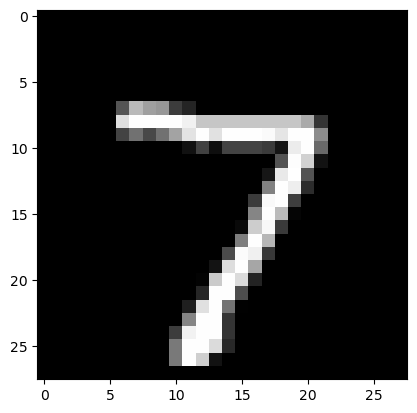

In [65]:
import matplotlib.pyplot as plt
plt.imshow(X[0], cmap = "gray")
plt.show()

In [70]:
X_scaled = X.reshape(-1, 28*28) / 255       # 픽셀값이 0~255 사이에서 움직이므로 255로 나눠서 min-max scaling
X_scaled.shape

(10000, 784)

In [77]:
# 1번쨰 은닉층
W1 = np.random.randn(784, 50)
B1 = np.random.randn(50)     # 편향개수도 50개

A1 = X_scaled @ W1 + B1 
Z1 = sigmoid(A1)
Z1.shape

(10000, 50)

In [78]:
# 2번째 은닉층
W2 = np.random.randn(50, 100)
B2 = np.random.randn(100) 

A2 = Z1 @ W2 + B2
Z2 = sigmoid(A2)
Z2.shape

(10000, 100)

In [86]:
# 출력층 (소프트맥스)
W3 = np.random.randn(100, 10)
B3 = np.random.randn(10) 

A3 = Z2 @ W3 + B3
pred = softmax(A3)
pred         # 10000개의 데이터에 대한 확률

array([[7.17629945e-06, 1.76022123e-16, 6.32031888e-11, ...,
        2.52578709e-06, 3.11501524e-10, 4.95658355e-03],
       [1.07610233e-03, 6.22396706e-14, 1.01537943e-09, ...,
        4.37912841e-06, 6.42196479e-10, 8.79758740e-08],
       [4.36395492e-05, 1.06588394e-15, 5.81740932e-12, ...,
        1.04712348e-06, 6.92502458e-11, 3.32194246e-05],
       ...,
       [4.67719052e-05, 1.95249590e-15, 3.22997986e-11, ...,
        2.63620067e-04, 9.58294323e-10, 7.67159542e-06],
       [7.55909164e-06, 3.83296282e-13, 2.01830474e-10, ...,
        2.20197933e-07, 4.17520360e-11, 7.38478977e-04],
       [3.71049569e-04, 8.41840959e-14, 1.17495277e-12, ...,
        3.48869015e-03, 3.63172825e-10, 2.28178940e-08]])

In [88]:
pred[0]
# pred[0]이 0일확률, 1일확률,~~

array([7.17629945e-06, 1.76022123e-16, 6.32031888e-11, 3.02749581e-09,
       2.81382288e-10, 2.21855728e-10, 9.95033710e-01, 2.52578709e-06,
       3.11501524e-10, 4.95658355e-03])

In [92]:
np.argmax(pred[0])
# pred[0]일 가능성이 가장 높은 수

6

In [103]:
np.argmax(pred, axis = 1)

array([6, 6, 6, ..., 6, 6, 6], dtype=int64)

In [104]:
real = np.argmax(Y, axis = 1)   # 정답지
real

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [105]:
# 얼마나 맞았는지 비교
from sklearn.metrics import classification_report
report = classification_report(real, np.argmax(pred, axis = 1),
                               zero_division = 0)
print(report)

              precision    recall  f1-score   support

           0       0.04      0.00      0.01       980
           1       0.00      0.00      0.00      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.10      1.00      0.18       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



### 학습된 가중치로 확인

In [6]:
f = open("Data/sample_weight.pkl", 'rb')      # 학습된 가중치
net = pickle.load(f)
f.close()

In [7]:
net.keys()

dict_keys(['b2', 'W1', 'b1', 'W2', 'W3', 'b3'])

In [8]:
#내가추가 
for key in net:
    print(f"{key}: {net[key].shape}")

b2: (100,)
W1: (784, 50)
b1: (50,)
W2: (50, 100)
W3: (100, 10)
b3: (10,)


In [109]:
X_scaled.shape

(10000, 784)

In [110]:
net["W1"]

array([[-0.00741249, -0.00790439, -0.01307499, ...,  0.01978721,
        -0.04331266, -0.01350104],
       [-0.01029745, -0.01616653, -0.01228376, ...,  0.01920228,
         0.02809811,  0.01450908],
       [-0.01309184, -0.00244747, -0.0177224 , ...,  0.00944778,
         0.01387301,  0.03393568],
       ...,
       [ 0.02242565, -0.0296145 , -0.06326169, ..., -0.01012643,
         0.01120969,  0.01027199],
       [-0.00761533,  0.02028973, -0.01498873, ...,  0.02735376,
        -0.01229855,  0.02407041],
       [ 0.00027915, -0.06848375,  0.00911191, ..., -0.03183098,
         0.00743086, -0.04021148]], dtype=float32)

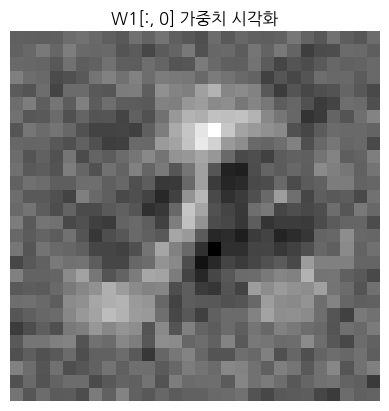

In [11]:
#내가추가 
import matplotlib.pyplot as plt
import koreanize_matplotlib
import warnings
warnings.filterwarnings('ignore')

# 예: net['W1']의 첫 번째 뉴런 가중치 (shape: (784,))
W1 = net['W1']       # shape: (784, 은닉층 뉴런 수)

# 첫 번째 뉴런의 가중치를 28x28로 reshape (MNIST 기준)
plt.imshow(W1[:, 0].reshape(28, 28), cmap='gray')
plt.title("W1[:, 0] 가중치 시각화")
plt.axis("off")
plt.show()

In [123]:
# 1번쨰 은닉층
A1 = X_scaled @ net["W1"] + net["b1"]  
Z1 = sigmoid(A1)

# 2번째 은닉층
A2 = Z1 @ net["W2"] + net["b2"]  
Z2 = sigmoid(A2)

# 출력층 (소프트맥스)
A3 = Z2 @ net["W3"] + net["b3"] 
pred = softmax(A3)
pred         # 10000개의 데이터에 대한 확률

array([[8.44125033e-05, 2.63506448e-06, 7.15494238e-04, ...,
        9.97064966e-01, 9.37447336e-06, 8.18311658e-04],
       [4.83633078e-03, 1.10458594e-03, 9.44252241e-01, ...,
        1.27084349e-06, 1.28642348e-03, 4.78646841e-08],
       [1.03583035e-07, 9.88972589e-01, 4.28948968e-03, ...,
        2.26997299e-03, 1.23787015e-03, 8.67146780e-05],
       ...,
       [4.87633309e-07, 7.04747172e-05, 7.31144951e-05, ...,
        7.52423895e-04, 5.95428981e-03, 2.20708730e-02],
       [6.24384858e-04, 7.67556916e-04, 1.24992092e-04, ...,
        3.81287464e-05, 8.62064915e-02, 8.99350225e-05],
       [4.28828339e-04, 2.00430152e-06, 2.54056604e-03, ...,
        4.34993796e-07, 6.37568425e-06, 3.77514031e-07]])

In [124]:
pred[0]

array([8.44125033e-05, 2.63506448e-06, 7.15494238e-04, 1.25862625e-03,
       1.17279510e-06, 4.49908218e-05, 1.62693174e-08, 9.97064966e-01,
       9.37447336e-06, 8.18311658e-04])

In [125]:
np.argmax(pred[0])

7

In [126]:
np.argmax(pred, axis = 1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [127]:
real = np.argmax(Y, axis = 1)   # 정답지
real

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [128]:
# 얼마나 맞았는지 비교
from sklearn.metrics import classification_report
report = classification_report(real, np.argmax(pred, axis = 1),
                               zero_division = 0)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.98      0.98      0.98      1135
           2       0.93      0.92      0.92      1032
           3       0.92      0.93      0.92      1010
           4       0.93      0.94      0.93       982
           5       0.94      0.89      0.91       892
           6       0.93      0.95      0.94       958
           7       0.94      0.93      0.94      1028
           8       0.92      0.91      0.92       974
           9       0.92      0.91      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.94      0.94      0.94     10000



In [129]:
## 강사님풀이
def forward(net, x):
    w1, w2, w3 = net['W1'], net['W2'], net['W3']
    b1, b2, b3 = net['b1'], net['b2'], net['b3']

    a1 = x @ w1 + b1
    z1 = sigmoid(a1)

    a2 = z1 @ w2 + b2
    z2 = sigmoid(a2)

    a3 = z2 @ w3 + b3
    return softmax(a3)

In [132]:
pred = np.argmax(forward(net, X_scaled), axis = 1)
real = np.argmax(Y, axis = 1)

report = classification_report(real, pred, zero_division = 0)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.98      0.98      0.98      1135
           2       0.93      0.92      0.92      1032
           3       0.92      0.93      0.92      1010
           4       0.93      0.94      0.93       982
           5       0.94      0.89      0.91       892
           6       0.93      0.95      0.94       958
           7       0.94      0.93      0.94      1028
           8       0.92      0.91      0.92       974
           9       0.92      0.91      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.94      0.94      0.94     10000



# 연습문제
1. 입력 데이터 X와 첫 번째 층의 가중치 W1, 편향 B1이 다음과 같을 때, 활성화 함수를 적용하기 전의 가중 합 결과 A1을 계산하세요.

In [133]:
X = np.array([0.8, 0.2])
W1 = np.array([[0.1, 0.4, 0.7], [0.2, 0.5, 0.8]])
B1 = np.array([0.1, 0.1, 0.1])

A1 = X @ W1 + B1
A1

array([0.22, 0.52, 0.82])

2. 문제 1에서 계산된 A1 값에 sigmoid 활성화 함수를 적용하여 첫 번째 은닉층의 최종 출력 Z1을 계산하고 출력하세요.

In [134]:
Z1 = sigmoid(A1)
Z1

array([0.55477924, 0.62714777, 0.69423634])

3. 입력 X, 가중치 W, 편향 B가 주어졌을 때, 가중 합을 구하고 sigmoid 활성화 함수를 적용하여 해당 층의 출력 Z를 계산하는 코드를 작성하세요.

In [180]:
X = np.array([0.8, 0.2])
W1 = np.array([[0.1, 0.4, 0.7], [0.2, 0.5, 0.8]])
B1 = np.array([0.1, 0.1, 0.1])

A = X @ W1 + B1
Z = sigmoid(A)
Z

array([0.55477924, 0.62714777, 0.69423634])

4. 입력 데이터 X의 shape이 (10, 5)이고, 첫 번째 은닉층의 뉴런 수가 8개라고 할 때, 첫 번째 층의 가중치 행렬 W1과 편향 벡터 B1의 적절한 shape은 무엇일까요? 그리고 A1 = X @ W1 + B1 연산 후 A1의 shape은 무엇이 될까요? (NumPy 코드는 작성하지 않고 shape만 답하세요)

* W1의 shape: ?
* B1의 shape: ?
* A1의 shape: ?

5. 신경망의 마지막 층에서 얻은 값 logits = np.array([1.0, 2.0, 0.5]) 가 있다고 가정합니다. 이 값에 softmax 함수를 직접 만들어보면서 이해하고 적용하여 각 클래스에 대한 확률값 probabilities를 계산하고, 계산된 확률값들의 합이 1이 되는지 확인하세요.

In [181]:
logits = np.array([1.0, 2.0, 0.5])

np.exp(logits) / np.sum(np.exp(logits))

array([0.2312239 , 0.62853172, 0.14024438])

6. 입력 값 a = np.array([1000, 1010, 990]) 에 대해 강의에서 사용된 이 값에 softmax 함수를 직접 만들어보면서 안정성이 개선된 softmax 함수를 적용한 결과를 계산하세요. 왜 큰 값에 대해 안정성 개선(최댓값 빼기)이 필요한지 간단히 설명하세요.

In [182]:
a = np.array([1000, 1010, 990])
c = np.max(a)

np.exp(a-c) / np.sum(np.exp(a-c))

array([4.53978686e-05, 9.99954600e-01, 2.06106005e-09])

7. 여러 샘플(배치)에 대한 값 batch_logits가 2차원 배열로 주어졌을 때, 이 배열을 처리할 수 있는 softmax 함수를 직접 만들어보면서 각 샘플(행)별로 softmax 함수를 적용하여 확률값을 계산하는 코드를 작성하세요.

In [187]:
batch_logits = np.array([[1, 2, 0], [3, 1, 1], [0, 4, 2]])

c = np.max(batch_logits, axis = 1).reshape(-1, 1)
A = np.exp(batch_logits - c)
B = np.sum(A, axis = 1). reshape(-1, 1)

batch_probabilities = A / B
batch_probabilities

array([[0.24472847, 0.66524096, 0.09003057],
       [0.78698604, 0.10650698, 0.10650698],
       [0.01587624, 0.86681333, 0.11731043]])

8. 문제 7에서 계산된 batch_probabilities 배열 (각 행은 하나의 샘플에 대한 클래스별 확률)이 주어졌을 때, np.argmax 함수를 사용하여 각 샘플에 대해 가장 확률이 높은 클래스의 인덱스를 찾아 predictions 배열에 저장하고 출력하세요.

In [188]:
pred = np.argmax(batch_probabilities, axis = 1)
pred

array([1, 0, 1], dtype=int64)

9. 입력 X, 첫 번째 층의 가중치/편향 (W1, B1), 두 번째 층의 가중치/편향 (W2, B2)가 다음과 같을 때, 첫 번째 층과 두 번째 층 모두 sigmoid 활성화 함수를 사용하여 두 번째 은닉층의 최종 출력 Z2를 계산하세요.

In [179]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

A1 = A1 = X @ W1 + B1 
Z1 = sigmoid(A1)

A2 = Z1 @ W2 + B2  
Z2 = sigmoid(A2)
Z2

array([0.62624937, 0.7710107 ])

10. 이 데이터가 어떤 숫자인가요? 학습된 가중치를 활용해서 예측해보세요. ("sample_weight.pkl")

In [189]:
A = np.array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01568627, 0.14509804, 0.50196078, 0.54901961, 0.54901961,
       0.54901961, 0.22745098, 0.0627451 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.18431373, 0.4627451 , 0.76078431, 0.99215686,
       0.99215686, 0.99215686, 0.99215686, 0.99215686, 0.99215686,
       0.84313725, 0.31372549, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.4       , 0.77647059,
       0.99215686, 0.89803922, 0.60784314, 0.12941176, 0.07843137,
       0.07843137, 0.16470588, 0.48627451, 0.98431373, 0.96862745,
       0.63529412, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.24705882, 0.9254902 , 0.95294118, 0.41176471, 0.02352941,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.41176471, 0.99215686, 0.95686275, 0.2       ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.94901961, 0.99215686,
       0.49411765, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01960784,
       0.78039216, 0.99215686, 0.28235294, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.99215686, 0.44705882, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.75294118, 0.99215686,
       0.28235294, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.40392157,
       0.25098039, 0.0745098 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.1372549 , 0.95686275, 0.89019608, 0.04705882, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.49803922, 0.99215686,
       0.5372549 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.47058824, 0.99215686, 0.55686275, 0.01176471, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.27058824, 0.99215686, 0.83529412,
       0.10588235, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.47058824,
       0.90196078, 0.71764706, 0.10980392, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.08627451, 0.62745098, 0.98039216, 0.70588235, 0.01176471,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.76078431, 0.99215686,
       0.81176471, 0.30980392, 0.0627451 , 0.1254902 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.07058824, 0.18431373, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.05098039,
       0.60392157, 0.98039216, 0.99215686, 0.99215686, 0.99215686,
       0.91372549, 0.92156863, 0.8745098 , 0.89411765, 0.89411765,
       0.89411765, 0.78823529, 0.50588235, 0.91764706, 0.95294118,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.27058824, 0.99215686, 0.50980392,
       0.3254902 , 0.3254902 , 0.3254902 , 0.3254902 , 0.27058824,
       0.55294118, 0.56078431, 0.60392157, 0.35686275, 0.83921569,
       0.56078431, 0.89803922, 0.99215686, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01568627, 0.14117647, 0.0745098 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05882353, 0.        , 0.09019608,
       0.14117647, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [191]:
np.argmax(forward(net, A))

2